<a href="https://colab.research.google.com/github/liora0/mitfuturemakers/blob/main/Day21Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 16s 12ms/step - loss: 0.3852 - val_loss: 0.1900
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1801 - val_loss: 0.1544
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1499 - val_loss: 0.1352
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1330 - val_loss: 0.1225
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1214 - val_loss: 0.1134
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1129 - val_loss: 0.1068
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1068 - val_loss: 0.1021
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1025 - val_loss: 0.0990
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0997 - val_loss: 0.0968
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0978 - val_l

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

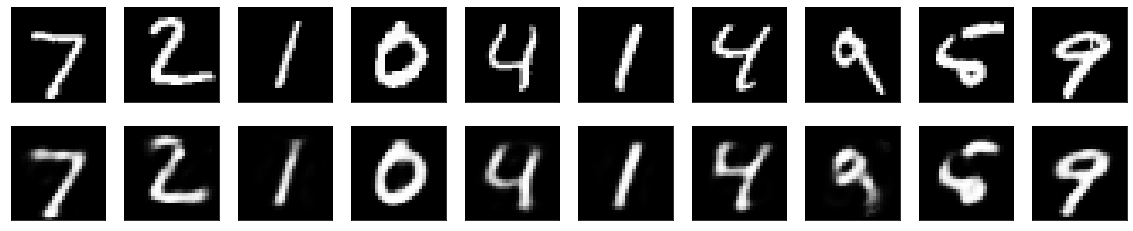

In [9]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:

from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 11ms/step - loss: 0.3894 - val_loss: 0.1980
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1879 - val_loss: 0.1625
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1583 - val_loss: 0.1439
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1420 - val_loss: 0.1323
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1315 - val_loss: 0.1246
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1243 - val_loss: 0.1188
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1187 - val_loss: 0.1145
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1149 - val_loss: 0.1114
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1117 - val_loss: 0.1091
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1099 - val_lo

In [12]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [14]:

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 71s 147ms/step - loss: 0.3584 - val_loss: 0.1450
Epoch 2/10
469/469 [==============================] - 69s 147ms/step - loss: 0.1391 - val_loss: 0.1248
Epoch 3/10
469/469 [==============================] - 69s 147ms/step - loss: 0.1241 - val_loss: 0.1183
Epoch 4/10
469/469 [==============================] - 69s 147ms/step - loss: 0.1180 - val_loss: 0.1139
Epoch 5/10
469/469 [==============================] - 71s 151ms/step - loss: 0.1148 - val_loss: 0.1111
Epoch 6/10
469/469 [==============================] - 69s 147ms/step - loss: 0.1115 - val_loss: 0.1090
Epoch 7/10
469/469 [==============================] - 69s 148ms/step - loss: 0.1099 - val_loss: 0.1073
Epoch 8/10
469/469 [==============================] - 71s 152ms/step - loss: 0.1077 - val_loss: 0.1062
Epoch 9/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1065 - val_loss: 0.1048
Epoch 10/10
469/469 [==============================] - 70s 148ms/step - l

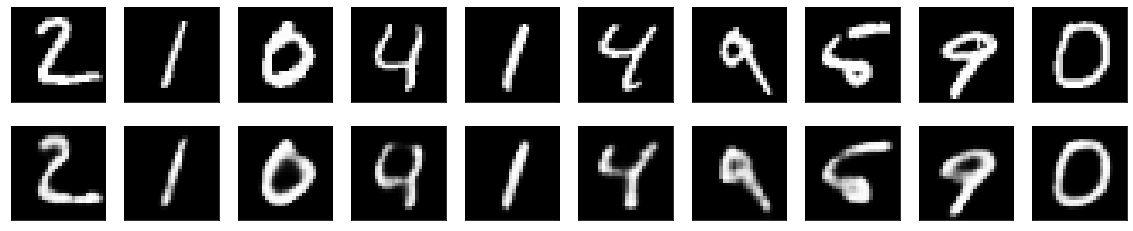

In [15]:

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

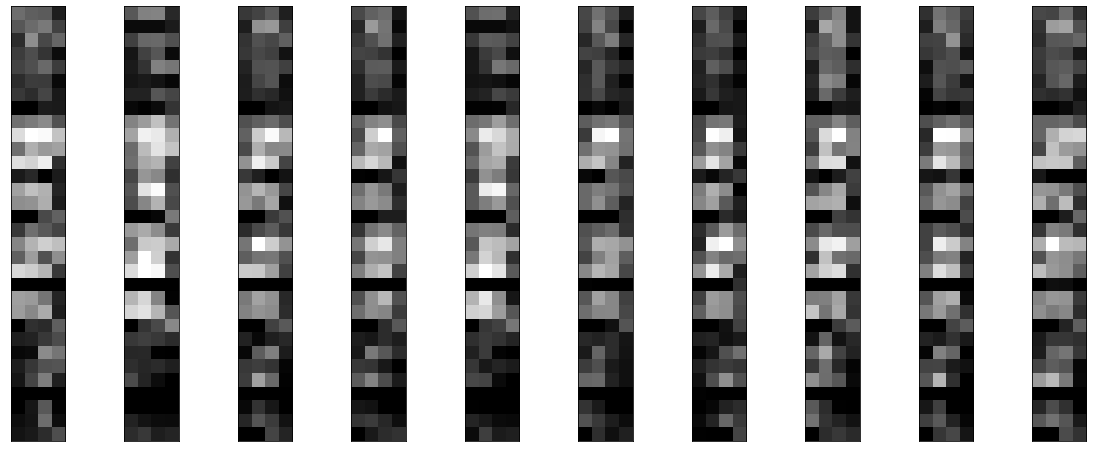

In [16]:

encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

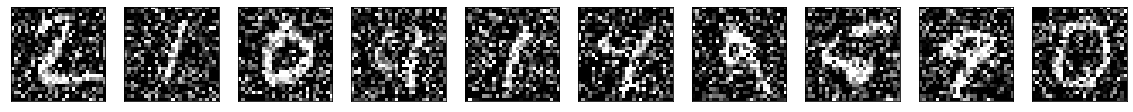

In [18]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train_noisy, x_train, epochs=15, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/15
469/469 [==============================] - 138s 291ms/step - loss: 0.2390 - val_loss: 0.1177
Epoch 2/15
469/469 [==============================] - 137s 291ms/step - loss: 0.1158 - val_loss: 0.1094
Epoch 3/15
469/469 [==============================] - 134s 286ms/step - loss: 0.1094 - val_loss: 0.1057
Epoch 4/15
469/469 [==============================] - 133s 284ms/step - loss: 0.1063 - val_loss: 0.1038
Epoch 5/15
469/469 [==============================] - 132s 282ms/step - loss: 0.1044 - val_loss: 0.1021
Epoch 6/15
469/469 [==============================] - 132s 282ms/step - loss: 0.1025 - val_loss: 0.1007
Epoch 7/15
469/469 [==============================] - 132s 282ms/step - loss: 0.1013 - val_loss: 0.0993
Epoch 8/15
469/469 [==============================] - 132s 282ms/step - loss: 0.1002 - val_loss: 0.0986
Epoch 9/15
469/469 [==============================] - 132s 281ms/step - loss: 0.0991 - val_loss: 0.0986
Epoch 10/15
469/469 [==============================] - 132s 282m

In [21]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [22]:

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [23]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [24]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 221.5428 - val_loss: 169.0174
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 167.9624 - val_loss: 164.0191
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 163.1368 - val_loss: 161.6047
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 160.6778 - val_loss: 159.8424
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 159.1492 - val_loss: 158.3908
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 157.9014 - val_loss: 157.1999
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 156.6649 - val_loss: 156.3179
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 155.7990 - val_loss: 155.1997
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 155.0413 - val_loss: 154.4629
Epoch 10/10
1875/1875 [======================

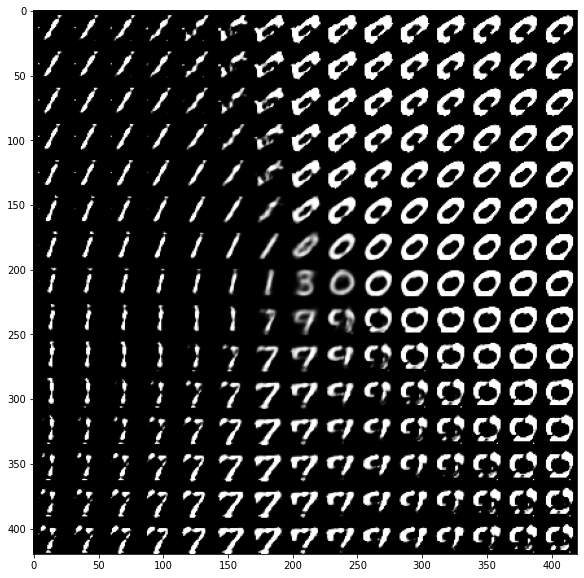

In [26]:

n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()